# Q-Learning vs Double Q-Learning

In this notebook, we analyse the stability of the training process of Q-Learning vs Double Q-Learning on the Frozen Lake Environment. Note that double Q-Learning does not converge for frozen lake.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [2]:
np.random.seed(0)

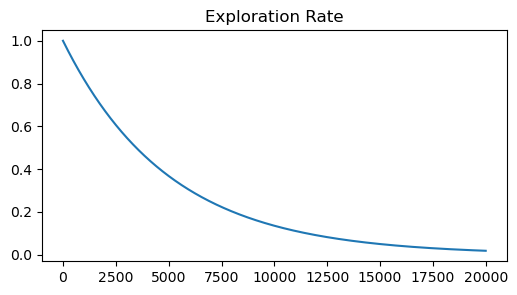

In [3]:
# Parameters

alpha = 0.1 # learning rate
gamma = 0.99 # discount rate

def epsilon(episode):
    """
    Returns the exploration rate given the episode number
    """
    max, min, decay_rate = 1, 0, 0.0002
    return min + (max-min) * np.exp(-decay_rate*episode)

num_episodes = 20000
max_steps = 100 # maximum number of steps per episode

plt.figure(figsize=(6,3))
plt.plot([epsilon(i) for i in range(num_episodes)]);
plt.title('Exploration Rate');

In [4]:
# Setting-up Environment and Q-Table

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True) # what happens if we change is_slippery to true?

num_states = env.observation_space.n
num_actions = env.action_space.n

In [5]:
num_iterations = 10

### Q-Learning

In [6]:
all_iterations_Q = []

for i in range(num_iterations):
    all_rewards = []
    Q = np.zeros((num_states, num_actions)) # initialize Q(s,a) arbitrarily

    for episode in range(num_episodes):
        
        episode_reward = 0 # total reward for the current episode
        state = env.reset()
        
        for step in range(max_steps):
            
            if np.random.uniform(0, 1) < epsilon(episode):
                action = env.action_space.sample() # random action
            else:
                action = np.argmax(Q[state,:]) # greedy action
            
            next_state, reward, done, info = env.step(action)
            
            Q[state, action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state, action])
            
            state = next_state
            episode_reward += reward
            
            if done:
                break
            
        all_rewards.append(episode_reward)
    
    all_iterations_Q.append(all_rewards)
    print(f'Iteration {i+1}/{num_iterations} done 👍')

all_iterations_Q = np.array(all_iterations_Q)

Iteration 1/10 done 👍
Iteration 2/10 done 👍
Iteration 3/10 done 👍
Iteration 4/10 done 👍
Iteration 5/10 done 👍
Iteration 6/10 done 👍
Iteration 7/10 done 👍
Iteration 8/10 done 👍
Iteration 9/10 done 👍
Iteration 10/10 done 👍


### Double Q-Learning

In [7]:
all_iterations_double_Q = []

for i in range(num_iterations):
    all_rewards = []

    Q1, Q2 = np.zeros((num_states, num_actions)), np.zeros((num_states, num_actions))

    for episode in range(num_episodes):
        
        episode_reward = 0 # total reward for the current episode
        state = env.reset()
        
        for step in range(max_steps):
            
            if np.random.uniform(0, 1) < epsilon(episode):
                action = env.action_space.sample() # random action
            else:
                action = np.argmax(Q1[state,:] + Q2[state,:]) # greedy action
            
            next_state, reward, done, info = env.step(action)
            
            if np.random.uniform(0, 1) < 0.5:
                # update Q1
                next_action = np.argmax(Q1[next_state, :])
                Q1[state, action] = Q1[state, action] + alpha*(reward + gamma*np.max(Q2[next_state, next_action]) - Q1[state, action])
            else:
                # update Q2
                next_action = np.argmax(Q2[next_state, :])
                Q2[state, action] = Q2[state, action] + alpha*(reward + gamma*np.max(Q1[next_state, next_action]) - Q2[state, action])
            
            state = next_state
            episode_reward += reward
            
            if done:
                break
            
        all_rewards.append(episode_reward)
    
    all_iterations_double_Q.append(all_rewards)
    print(f'Iteration {i+1}/{num_iterations} done 👍')

all_iterations_double_Q = np.array(all_iterations_double_Q)

Iteration 1/10 done 👍
Iteration 2/10 done 👍
Iteration 3/10 done 👍
Iteration 4/10 done 👍
Iteration 5/10 done 👍
Iteration 6/10 done 👍
Iteration 7/10 done 👍
Iteration 8/10 done 👍
Iteration 9/10 done 👍
Iteration 10/10 done 👍


### Analysis

In [8]:
def moving_average(array, n=100):
    """
    Returns the moving average of an array over a window of size n.
    """
    return np.convolve(array, np.ones(n), 'valid')/n

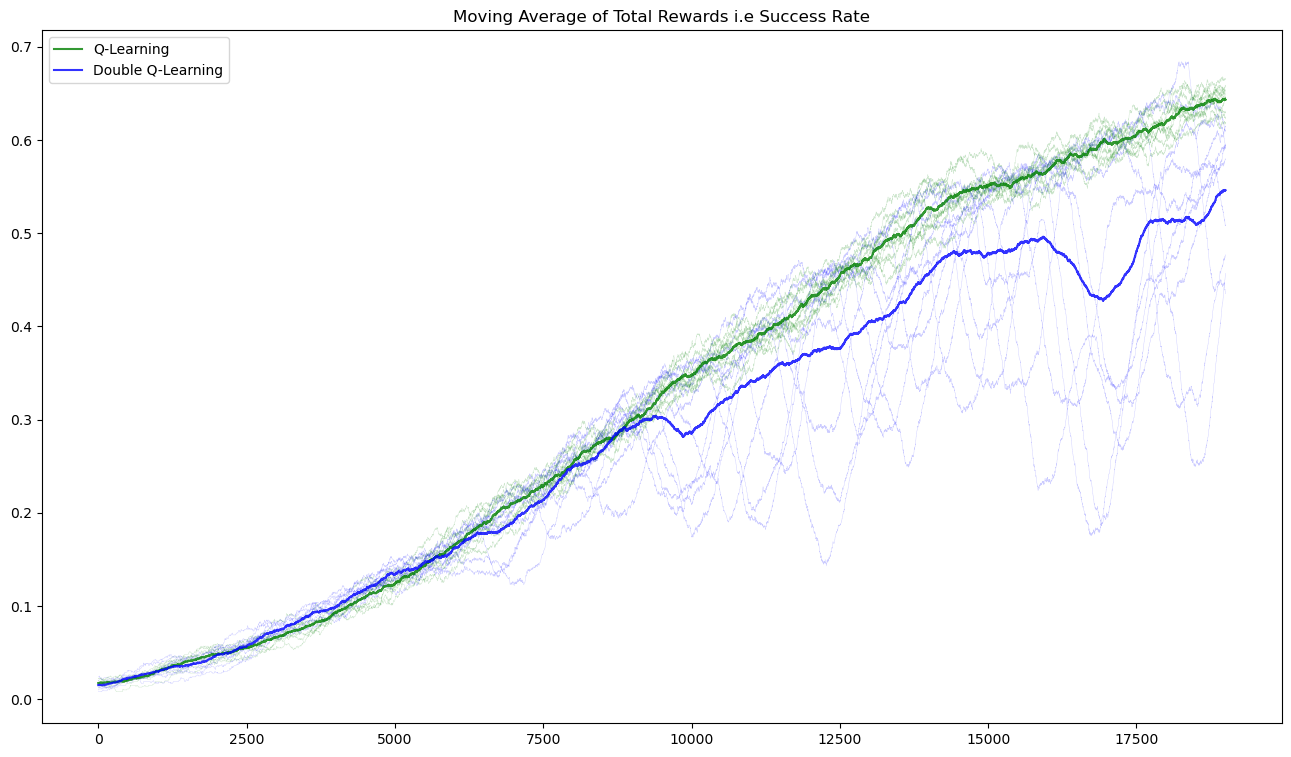

In [18]:
window = 1000

plt.figure(figsize=(16, 9));
plt.title('Moving Average of Total Rewards i.e Success Rate');
for i in range(num_iterations):
    plt.plot(moving_average(all_iterations_Q[i], window), alpha=0.2, color='green', lw=0.3);
    plt.plot(moving_average(all_iterations_double_Q[i], window), alpha=0.2, color='blue', lw=0.3);
plt.plot(moving_average(all_iterations_Q.mean(axis=0), window), alpha=0.8, color='green', label='Q-Learning');
plt.plot(moving_average(all_iterations_double_Q.mean(axis=0), window), alpha=0.8, color='blue', label='Double Q-Learning');
plt.legend();